# 小麦とチェス盤問題
##  サンプルコード

In [1]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2 * small_board_list[-1])
print('4マスの板に小麦を並べる(リスト) : {}'.format(small_board_list))

4マスの板に小麦を並べる(リスト) : [1, 2, 4, 8]


In [2]:
import numpy as np
small_board_ndarray = np.array(small_board_list)
print('4マスの板に小麦を並べる(ndarray) : {}'.format(small_board_ndarray))

4マスの板に小麦を並べる(ndarray) : [1 2 4 8]


## 【問題1】2×2マスのチェス盤の小麦の数

In [3]:
chess_board_22 = small_board_ndarray.reshape(2, 2)
print('2*2マスのチェス盤に小麦を並べる : \n{}'.format(chess_board_22))

2*2マスのチェス盤に小麦を並べる : 
[[1 2]
 [4 8]]


## 【問題2】n×mマスへの拡張

In [4]:
import matplotlib.pyplot as plt


# 関数の定義
def chess_board_wheal(vertical, side):
	"""
	function : 縦[vertical] * 横[side]のマスを持つチェス盤に1,2,4と倍々に小麦を置いた配列[chess_board_and_wheal]を返す関数
	:param vertical : int
		チェス盤の縦のマス数
	:param side : int
		チェス盤の横のマス数
	number_of_square : int
		マスの総数
	board_list : list
		マスを右上から一列に並べたと仮定して小麦を置いたリスト
	:return : chess_board_chess_wheal
		小麦を置いた後の配列
	"""

	# マスの合計の計算
	number_of_square = vertical * side
	# リストの作成及び初期値の代入
	board_list = [1]
	# リストの計算及び追加
	for _ in range(number_of_square - 1):
		board_list.append(2 * board_list[-1])
	# ndarrayへの変換
	board_ndarray = np.array(board_list)
	# 指定された形への変換
	chess_board_and_wheal = board_ndarray.reshape(vertical, side)

	# 返り値の設定
	return chess_board_and_wheal


# 8 * 8マスのチェス盤での小麦の数を求める
chess_board_88 = chess_board_wheal(8, 8)
# 結果の表示
print('8*8マスのチェス盤に小麦を並べる : \n{}'.format(chess_board_88))

8*8マスのチェス盤に小麦を並べる : 
[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168602

## 【問題3】小麦の数の合計

8*8マスのチェス盤に置かれた小麦の総数は1.844674e+19個です
列1の値の平均は9.042522e+15です。
列2の値の平均は1.808504e+16です。
列3の値の平均は3.617009e+16です。
列4の値の平均は7.234017e+16です。
列5の値の平均は1.446803e+17です。
列6の値の平均は2.893607e+17です。
列7の値の平均は5.787214e+17です。
列8の値の平均は1.157443e+18です。


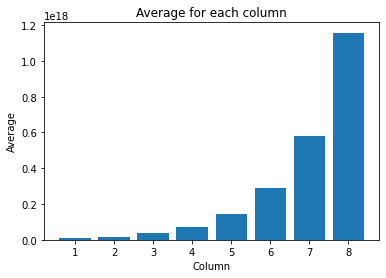

In [5]:
# 全部のマスの小麦の数の合計
print('8*8マスのチェス盤に置かれた小麦の総数は{:e}個です'.format(chess_board_88.sum()))

# 各列の平均値を求めるためのパラメータ設定
list_of_average_for_each_columns = []
count = 0

# 各列の平均値を求める計算式
for column in range(chess_board_88.shape[0]):
	for row in range(chess_board_88.shape[1]):
		count += chess_board_88[row][column]
	list_of_average_for_each_columns.append(count / 8)
	count = 0

# 結果の表示
for column, average in enumerate(list_of_average_for_each_columns, 1):
	print('列{}の値の平均は{:e}です。'.format(column, average))

# グラフの表示
plt.title('Average for each column')
plt.xlabel('Column')
plt.ylabel('Average')
plt.bar(np.arange(1, 9), list_of_average_for_each_columns)
plt.show()

## 【問題4】小麦の数のヒートマップ
### サンプルコード
かなり内容は変更している

subplots()でfig(描写領域)とax1(グラフの詳細)をさだめるパターン   
軸等の決め方は下記参照  
軸反転がaxisのメソッドにしか見つけられなかったため今回使用している  
しかしながら、ヒートマップを描く際簡略的に(arrayを用いて？)描く場合plt,ax1双方でかけるが書き方が異なる  
おそらく簡単なのはpltで書いてしまうこと、ax1は少し複雑っぽい  
また、colorbarも同様であるがpltの場合下記の書き方で問題ないがaxで書くとmatpableという値が必要になる  
書き方は難しそう、今は使わないので今度調べる

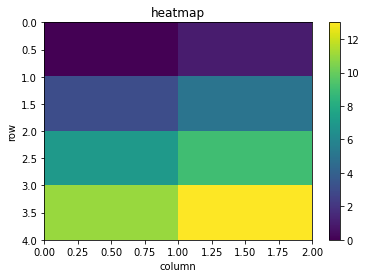

In [6]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('colums')
ax1.set_xlabel("column")
ax1.set_ylabel("row")
ax1.set_title("heatmap")
ax1.invert_yaxis()
plt.pcolor(np.array([0, 1, 3, 5, 7, 9, 11, 13]).reshape(4, 2))
plt.colorbar()
plt.show()

## 回答

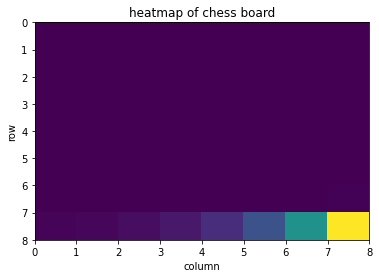

In [7]:
# 描画領域の作成
fig, ax = plt.subplots()
# ラベルの作成
ax.set_xlabel("column")
ax.set_ylabel("row")
ax.set_title("heatmap of chess board")
# y軸の反転
ax.invert_yaxis()
# ヒートマップの作成
plt.pcolor(chess_board_wheal(8, 8))
plt.show()

## 【問題5】後半は前半の何倍か

In [8]:
# 前後半の小麦の数を求める計算式
first_half = 0
latter_half = 0
count1 = 0
count2 = 0

# 計算
for column in range(chess_board_88.shape[0]):
	for row in range(chess_board_88.shape[1]):
		if column <= 3:
			first_half += chess_board_88[column][row]
			count1 += 1
		else:
			latter_half += chess_board_88[column][row]
			count2 += 1

# 結果の表示
print(count1 == count2)
print('チェス盤の後半にある小麦の数は前半にある小麦の数の{:e}倍です。'.format(latter_half // first_half))


True
チェス盤の後半にある小麦の数は前半にある小麦の数の4.294967e+09倍です。


## 【問題6】他の計算方法によるn×mマスへの拡張

### np.append()を用いた関数

In [9]:
# 関数の定義
def chess_board_wheal_npappend(vertical, side):
	"""
	function : 縦[vertical] * 横[side]のマスを持つチェス盤に1,2,4と倍々に小麦を置いた配列[chess_board_and_wheal]を返す関数
	:param vertical : int
		チェス盤の縦のマス数
	:param side : int
		チェス盤の横のマス数
	number_of_square : int
		マスの総数
	board_list : list
		マスを右上から一列に並べたと仮定して小麦を置いたリスト
	:return : chess_board_chess_wheal
		小麦を置いた後の配列
	"""

	# マスの合計の計算
	number_of_square = vertical * side
	# リストの作成及び初期値の代入
	board_ndarray = np.array([1])
	# リストの計算及び追加
	for _ in range(number_of_square - 1):
		board_ndarray = np.append(board_ndarray, 2 * board_ndarray[-1])
	# ndarrayへの変換
	board_ndarray = np.array(board_ndarray).astype(np.uint64)
	# 指定された形への変換
	chess_board_and_wheal = board_ndarray.reshape(vertical, side)

	# 返り値の設定
	return chess_board_and_wheal


# 8 * 8マスのチェス盤での小麦の数を求める
chess_board_88 = chess_board_wheal_npappend(8, 8)

# 結果の表示
print('8*8マスのチェス盤に小麦を並べる : \n{}'.format(chess_board_88))

8*8マスのチェス盤に小麦を並べる : 
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       7036874417766

/var/folders/ll/cdp3xh194t7_9c631lm07yx00000gn/T/ipykernel_33297/98631065.py:23: RuntimeWarning: overflow encountered in long_scalars
  board_ndarray = np.append(board_ndarray, 2 * board_ndarray[-1])


### ブロードキャストを用いた方法

In [10]:
# 関数の定義
def chess_board_wheal_broadcast(vertical, side):
	"""
	function : 縦[vertical] * 横[side]のマスを持つチェス盤に1,2,4と倍々に小麦を置いた配列[chess_board_and_wheal]を返す関数
	:param vertical : int
		チェス盤の縦のマス数
	:param side : int
		チェス盤の横のマス数
	number_of_square : int
		マスの総数
	board_list : list
		マスを右上から一列に並べたと仮定して小麦を置いたリスト
	:return : chess_board_chess_wheal
		小麦を置いた後の配列
	"""

	# マスの合計の計算
	number_of_square = vertical * side
	# リストの作成及び初期値の代入
	indices_of_square = np.arange(number_of_square)
	# リストの計算及び追加
	board_ndarray = 2 ** indices_of_square
	# ndarrayへの変換
	board_ndarray = np.array(board_ndarray).astype(np.uint64)
	# 指定された形への変換
	chess_board_and_wheal = board_ndarray.reshape(vertical, side)

	# 返り値の設定
	return chess_board_and_wheal


# 8 * 8マスのチェス盤での小麦の数を求める
chess_board_88 = chess_board_wheal_broadcast(8, 8)

# 結果の表示
print('8*8マスのチェス盤に小麦を並べる : \n{}'.format(chess_board_88))

8*8マスのチェス盤に小麦を並べる : 
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       7036874417766

## 【問題7】計算時間の比較

In [11]:
%%timeit
chess_board_88 = chess_board_wheal(8, 8)

15.1 µs ± 171 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
%%timeit
chess_board_88 = chess_board_wheal_npappend(8, 8)

/var/folders/ll/cdp3xh194t7_9c631lm07yx00000gn/T/ipykernel_33297/98631065.py:23: RuntimeWarning: overflow encountered in long_scalars
  board_ndarray = np.append(board_ndarray, 2 * board_ndarray[-1])


326 µs ± 8.78 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
%%timeit
chess_board_88 = chess_board_wheal_broadcast(8, 8)

3.58 µs ± 211 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


上記の結果より実行速度は  
1. ブロードキャスト  
2. append  
3. np.append    

の順となった  
listの呼び出す回数と書き込む回数順に比例する  
また、npappendが警告にもあるように著しく遅いため、極力使用しない方がよいと考えられる。